In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import typing
from sympy import *

init_printing()

In [6]:
x = symbols("x")
def generateFourierExpr(n:int = 10):
    x = symbols("x")
    sign = 1
    expr = 0
    for i in range(1, 2*n+1, 2):
        expr += sign * cos(x*i*pi) / i
        sign *= -1
    return (4/pi)*expr

In [7]:
fourier_expr = generateFourierExpr(7)
fourier_expr

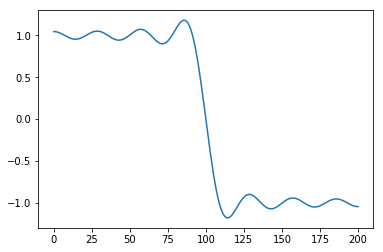

In [8]:
X = np.linspace(0,1,201)
f = lambdify(x, fourier_expr, "numpy")
plt.plot(f(X))

In [44]:
Ys = np.zeros(shape=(250,X.size))
for i in range(Ys.shape[0]):
    expr = generateFourierExpr(n = i)
    f = lambdify(x, expr, "numpy")
    Ys[i] = f(X)

<IPython.core.display.Javascript object>


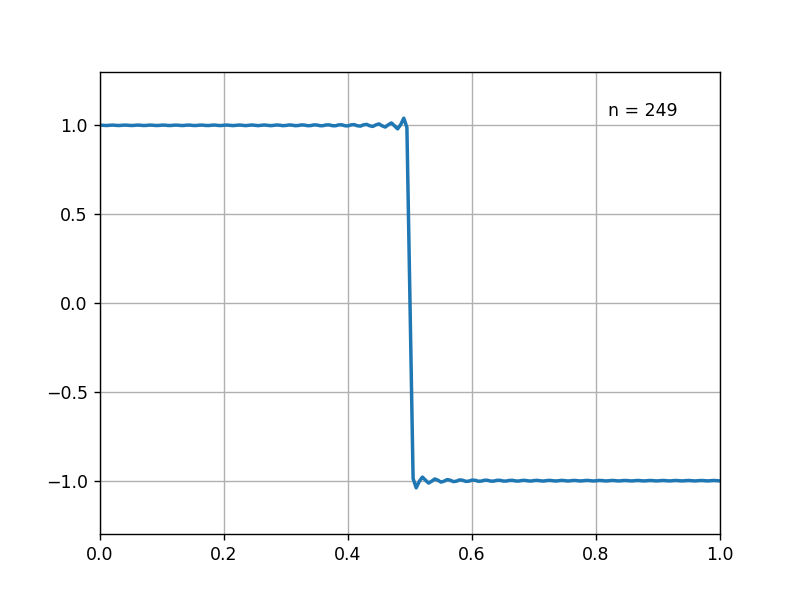

In [49]:
import matplotlib.animation as animation
%matplotlib nbagg

Writer = animation.FFMpegWriter
writer = Writer(fps=100, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False,
                     xlim=(0,1), ylim=(-1.3, 1.3))   # aspect='equal',
ax.grid()

line, = ax.plot([], [], '-', lw=2)

time_text = ax.text(0.82, 1.05, '')

def init():
    """initialize animation"""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    """perform animation step"""
    line.set_data(X, Ys[i])
    time_text.set_text('n = %.1i' % i)
    return line, time_text#, energy_text
        
ani = animation.FuncAnimation(fig, animate, interval=100, blit=True, init_func=init)